# Question -- 2 
- Data collected from the NYT API Documentation
- The collected data is stored in the local harddisk using relative address path
- Followed by three analysis are performed

In [48]:
# Program to download the NYT data using API key for "ARCHIVE" 
# This collected is stored in the harddisk
import os
import requests
import json
url = []
url.append("https://api.nytimes.com/svc/archive/v1/1988/8.json")
url.append("https://api.nytimes.com/svc/archive/v1/1988/9.json")
url.append("https://api.nytimes.com/svc/archive/v1/1988/10.json")
url.append("https://api.nytimes.com/svc/archive/v1/1988/11.json")
url.append("https://api.nytimes.com/svc/archive/v1/1988/12.json")
outputlist=[]
for x in range(len(url)):
    outputlist.append(requests.get(url[x]+"?api-key=0715f983b3e448249d5387d2f521baf2").json())  
    outputfol='data/NYTAPI'
    path = (outputfol+'\\'+str("archive"+outputlist[x]['response']['docs'][0]['pub_date'][:7])+'.json')
    if not os.path.exists(outputfol):
            os.makedirs(outputfol)
    if not os.path.exists(path):
            with open(path, 'w') as outfile:
                json.dump(outputlist, outfile)
                print(repr(x+1)+" Json dumped in folder")
    else:
        print(repr(x+1)+" Json already present")    

1 Json already present
2 Json already present
3 Json already present
4 Json already present
5 Json already present


In [46]:
# Program to download the NYT data using API key for "BOOKS - Names" 
# This collected is stored in the harddisk
import os
import requests
import json
outputlist1=[]
outputlist1 = requests.get("https://api.nytimes.com/svc/books/v3/lists/names.json?api-key=0715f983b3e448249d5387d2f521baf2").json()  
outputfol='data/NYTAPI'
path = (outputfol+'\\'+'BookListNames'+'.json')
if not os.path.exists(outputfol):
        os.makedirs(outputfol)
if not os.path.exists(path):
        with open(path, 'w') as outfile:
            json.dump(outputlist1, outfile)
            print("Json dumped in folder")
else:
    print("Json already present")

Json already present


In [102]:
# Program to download the NYT data using API key for "BOOKS - Overview" 
# This collected is stored in the harddisk
import os
import requests
import json
outputlist2=[]
outputlist2 = requests.get("https://api.nytimes.com/svc/books/v3/lists/overview.json?api-key=0715f983b3e448249d5387d2f521baf2").json()  
outputfol='data/NYTAPI'
path = (outputfol+'\\'+'BookListOverview'+'.json')
if not os.path.exists(outputfol):
        os.makedirs(outputfol)
if not os.path.exists(path):
        with open(path, 'w') as outfile:
            json.dump(outputlist2, outfile)
            print("Json dumped in folder")
else:
    print("Json already present")

Json already present


In [104]:
# Program to download the NYT data using API key for "Article" 
# This collected is stored in the harddisk
import os
import requests
import json
outputlist2=[]
outputlist2 = requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=0715f983b3e448249d5387d2f521baf2").json()  
outputfol='data/NYTAPI'
path = (outputfol+'\\'+'articlesearch'+'.json')
if not os.path.exists(outputfol):
        os.makedirs(outputfol)
if not os.path.exists(path):
        with open(path, 'w') as outfile:
            json.dump(outputlist2, outfile)
            print("Json dumped in folder")
else:
    print("Json already present")

Json dumped in folder


### The data is collected and stored in the local hard drive 

# Analysis -- 1 
- Finding the first publication date and latest publication date of a book
- Finding the period how long each book has been evolved in the society
- Finally the oldest book will taken out as an output of this analysis_1
- The evolution data of each book will be stored in a CSV file
- Graph will be plotted for easy understanding.

In [547]:
# The API Book - Names, which was stored in the list "outputlist1 is used"
# To get the data for First publication date of each book 
import nltk
from nltk import FreqDist
First_PubDate = [] 
count =0
for x in range(len(outputlist1['results'])):
    count += 1
    First_PubDate.append(outputlist1['results'][x]['oldest_published_date'])
print(len(First_PubDate))

53


In [548]:
# To get the data for latest publication date of each book 
import nltk
from nltk import FreqDist
Last_PubDate = [] 
count =0
for x in range(len(outputlist1['results'])):
    count += 1
    Last_PubDate.append(outputlist1['results'][x]['newest_published_date'])
print(len(Last_PubDate))

53


In [549]:
# converting the date string to required format in year, month and day
import datetime
First_PubDate_formated = []
for f in range(len(First_PubDate)):
    First_PubDate_formated.append(datetime.datetime.strptime(First_PubDate[f], '%Y-%m-%d'))
    
Last_PubDate_formated = []
for l in range(len(Last_PubDate)):
    Last_PubDate_formated.append(datetime.datetime.strptime(Last_PubDate[l], '%Y-%m-%d'))

# To get the Evolution period of each book the first published date is subracted from last Published date
Evolution_days = []
for e in range(len(First_PubDate_formated)):
    Evolution_days.append((Last_PubDate_formated[e]-First_PubDate_formated[e]).days)
print(len(Evolution_days))

53


In [550]:
# To get the data for each book name
import nltk
from nltk import FreqDist
Display_name = [] 
count =0
for x in range(len(outputlist1['results'])):
    count += 1
    Display_name.append(outputlist1['results'][x]['display_name'])
print(len(Display_name))

53


In [551]:
# joining the display name of book and their evolution period in days together

Book_Evolution = dict(zip(Display_name,Evolution_days))

In [552]:
#For the top 10, displaying of the Book's names with most evolution period along with their ranks
rank1 = 0
print ("Name of the BOOK".ljust(30) +  "   \t   " + "Rank".ljust(10) + "\t"+ "Evolution Period in days")
for w in sorted(Book_Evolution, key=Book_Evolution.get, reverse=True) [:10]:
    rank1 = rank1 + 1 
    print (repr(w).ljust(30) +  "   \t   " + repr(rank1).ljust(10) + "\t" + repr(Book_Evolution[w]))

Name of the BOOK                 	   Rank      	Evolution Period in days
'Children’s Series'              	   1         	3199
'Children’s Picture Books'       	   2         	3199
'Hardcover Fiction'              	   3         	3199
'Paperback Trade Fiction'        	   4         	3199
'Hardcover Nonfiction'           	   5         	3199
'Paperback Nonfiction'           	   6         	3199
'Paperback Mass-Market Fiction'   	   7         	3157
'Manga'                          	   8         	2877
'Hardcover Graphic Books'        	   9         	2877
'Paperback Graphic Books'        	   10        	2877


In [561]:
# Sperating the disctionery into two list with respective headings
xaxis = ["Name of the BOOK"]
yaxis = ["Evolution Period in Days"]

for w in sorted(Book_Evolution, key=Book_Evolution.get, reverse=True):
    xaxis.append(w)
    yaxis.append(Book_Evolution[w])

In [570]:
#Writing the above printed outputs along with headings to a CSV file 
#Using the local directory address path so the it can be used from any machine
import csv
rank = 0
rank2 = ['Rank']
if not os.path.exists('ana_[1-3]'):     
    os.mkdir('ana_[1-3]')
with open ('ana_[1-3]/Q2_A1_BookEvolution.csv', 'w' , newline='') as f:
    w = csv.writer(f,delimiter = ',')
    for i in range(len(xaxis)):
        rank = rank + 1
        rank2.append(rank) 
        w.writerow([xaxis[i], rank2[i],  yaxis[i]])

In [571]:
# For plotting the graph the heading is removed.
if xaxis[0] == "Name of the BOOK":
    del xaxis[0]
if yaxis[0] == "Evolution Period in Days":
    del yaxis[0]
if rank2[0] == "Rank":
    del rank2[0]

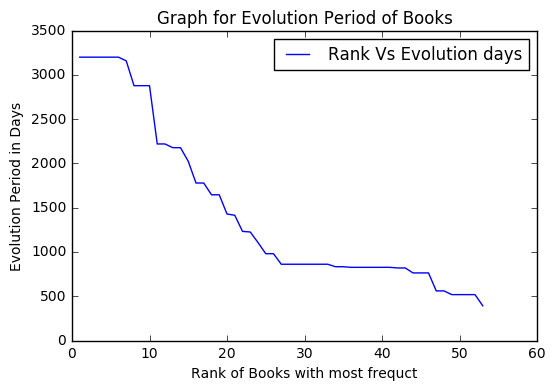

In [574]:
# Graph plotted for the Book's rank which has most highest number of Evolution days against the Evolution period in days
import matplotlib.pyplot as plt
plt.plot(rank2,yaxis, label="Rank Vs Evolution days")
plt.xlabel('Rank of Books with most frequct')
plt.ylabel('Evolution Period in Days')
plt.title("Graph for Evolution Period of Books")
plt.legend()
plt.show()

### Conclusion of Analysis -- 1
*From the above analysis it is clearly seen that the book "Children’s Series" has taken the rank 1 position which has highest period of days evolved*


# Analysis -- 2
- Finding the top high frequency "News Deck"
- Fetching the rank 1 frequency news Deck
- To find that which category "type_of_material" does this first rank news deck belongs too
- Export the data to a CSV file
- Plot the graph for the "type_of_material" against the frequency of "News Deck" after grouping
- In conclusion we will come to know how many times the first rank news deck has fall under different "type_of_material"

In [575]:
# To get the data for "news_desk" from all the files downloaded from the "Archive API"
import nltk
from nltk import FreqDist
News_Deck = []
for y in range(len(outputlist)):
    for x in range(len(outputlist[y]['response']['docs'])):
        News_Deck.append(outputlist[y]['response']['docs'][x]['news_desk'])

In [576]:
# Total number of files taken under "news_desk"
print(len(News_Deck)) 

41890


In [577]:
# To get the most frequent data from the "news_desk"
News_Deck_Freq = FreqDist(News_Deck)
print(News_Deck_Freq.most_common(10))

[('Financial Desk', 12949), ('National Desk', 4880), ('Sports Desk', 4135), ('Metropolitan Desk', 4102), ('Foreign Desk', 3031), ('Editorial Desk', 2124), ('Cultural Desk', 1821), ('Society Desk', 1181), ('Obituary', 999), ('Book Review Desk', 743)]


In [578]:
# Since the "News Deck" vlaue "Financial Desk" has the highest frequency, we will consider that for the analysis
Material_Type = []
for y in range(len(outputlist)):
    for x in range(len(outputlist[y]['response']['docs'])):
        if outputlist[y]['response']['docs'][x]['news_desk'] == 'Financial Desk':
            Material_Type.append(outputlist[y]['response']['docs'][x]['type_of_material'])
print(len(Material_Type))

12949


In [579]:
# To get the frequency of the Material type under the News_Deck "Financial Desk"
Material_Type_Freq = FreqDist(Material_Type)
print(Material_Type_Freq.most_common(10))

[('Statistics', 7202), ('News', 5397), ('Summary', 132), ('Letter', 90), ('Schedule', 50), ('List', 19), ('An Analysis; News Analysis', 18), ('Correction', 12), ('Interview', 11), ('Chronology', 8)]


In [580]:
# Sperating the disctionery into two list with respective headings
Material_typelist = ["Material Type"]
Material_freqlist = ["Frequency of Material Type"]
Materail_ranklist = ["Rank for most frequent"]
ranklist = 0
for w in sorted(Material_Type_Freq, key=Material_Type_Freq.get, reverse=True):
    ranklist = ranklist + 1
    Material_typelist.append(w)
    Material_freqlist.append(Material_Type_Freq[w])
    Materail_ranklist.append(ranklist)

In [581]:
#Writing the above printed outputs along with headings to a CSV file 
#Using the local directory address path so the it can be used from any machine
import csv
if not os.path.exists('ana_[1-3]'):     
    os.mkdir('ana_[1-3]')
with open ('ana_[1-3]/Q2_A2_NewsDesk_MaterialType.csv', 'w' , newline='') as f:
    w = csv.writer(f,delimiter = ',')
    for i in range(len(Material_typelist)): 
        w.writerow([Material_typelist[i], Materail_ranklist[i],  Material_freqlist[i]])

In [582]:
# For plotting the graph the heading is removed.
if Material_typelist[0] == "Material Type":
    del Material_typelist[0]
if Material_freqlist[0] == "Frequency of Material Type":
    del Material_freqlist[0]
if Materail_ranklist[0] == "Rank for most frequent":
    del Materail_ranklist[0]

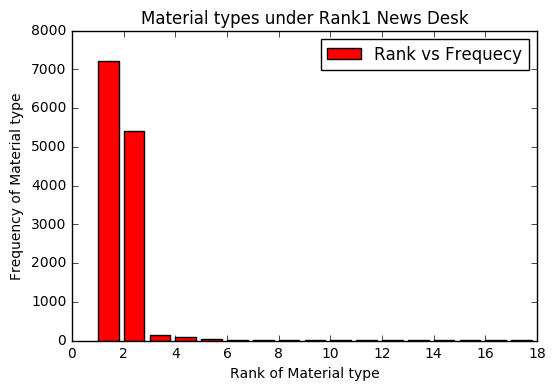

In [583]:
# Graph plotted for the Material's rank which has most highest number of "NewsDesk = Financial Desk" 
# against the Evolution period in days
import matplotlib.pyplot as plt
plt.bar(Materail_ranklist,Material_freqlist, label="Rank vs Frequecy",color='r')
plt.xlabel('Rank of Material type')
plt.ylabel('Frequency of Material type')
plt.title("Material types under Rank1 News Desk")
plt.legend()
plt.show()

### Conclusion of Analysis -- 2
*From the above analysis it is clearly seen that from the "Archive API" files the top Rank1 NewsDeck has classified more on the (MaterialType = Statistics and News) which has high spike*


# Analysis -- 3
- To find which type of material news are famous in a particular time period using the data "Archive API"
- Store the gathered data to a CSV file
- Plot the graph for the type of material and their frequency in a particular time period 

In [584]:
# To get the data for "Type of Material" from all the files downloaded from the "Archive API"
import nltk
from nltk import FreqDist
Total_Materialtype = []
for y in range(len(outputlist)):
    for x in range(len(outputlist[y]['response']['docs'])):
        Total_Materialtype.append(outputlist[y]['response']['docs'][x]['type_of_material'])

In [585]:
# The total number of materail type news from the "Archive API"
print(len(Total_Materialtype))

41890


In [586]:
# The Frequency distribution of all the material type news from the entire downloaded data
Total_Materialtype_Freq = FreqDist(Total_Materialtype)
Total_Materialtype_Freq.most_common(10)

[('News', 26007),
 ('Statistics', 7254),
 ('Letter', 2148),
 ('Review', 2125),
 ('Obituary', 999),
 ('Editorial', 610),
 ('Correction', 567),
 ('Caption', 534),
 ('Op-Ed', 349),
 ('List', 286)]

In [587]:
# To collect the materail type news on a particular period 
specific_Materialtype = []
for y in range(len(outputlist)):
    for x in range(len(outputlist[y]['response']['docs'])):
        if outputlist[y]['response']['docs'][x]['pub_date'] == '1988-08-01T00:00:00Z':
            specific_Materialtype.append(outputlist[y]['response']['docs'][x]['type_of_material'])

In [588]:
len(set(specific_Materialtype))

12

In [589]:
# The Frequency distribution of specific material type news (under time period) from the entire downloaded data
Specific_Materialtype_Freq = FreqDist(specific_Materialtype)
Specific_Materialtype_Freq.most_common(10)

[('News', 123),
 ('Letter', 9),
 ('Review', 5),
 ('Caption', 4),
 ('Editorial', 3),
 ('Schedule', 2),
 ('An Analysis; News Analysis', 2),
 ('Summary', 2),
 ('Correction', 2),
 ('Op-Ed', 2)]

In [600]:
# Sperating the disctionery into two list with respective headings
Specific_Materialtype_list = ["Type of the Material News"]
Specific_Materialfreq_list = ["Frequency of Material News"]
Specific_Materailrank_list = ["Rank for most frequent Material News"]
ranklist = 0
for w in sorted(Specific_Materialtype_Freq, key=Specific_Materialtype_Freq.get, reverse=True):
    ranklist = ranklist + 1
    Specific_Materialtype_list.append(w)
    Specific_Materialfreq_list.append(Specific_Materialtype_Freq[w])
    Specific_Materailrank_list.append(ranklist)

In [602]:
#Writing the above printed outputs along with headings to a CSV file 
#Using the local directory address path so the it can be used from any machine
import csv
if not os.path.exists('ana_[1-3]'):     
    os.mkdir('ana_[1-3]')
with open ('ana_[1-3]/Q2_A3_MaterialType_SpecificTime.csv', 'w' , newline='') as f:
    w = csv.writer(f,delimiter = ',')
    for i in range(len(Specific_Materialtype_list)): 
        w.writerow([Specific_Materialtype_list[i], Specific_Materailrank_list[i],  Specific_Materialfreq_list[i]])

In [603]:
# For plotting the graph the heading is removed.
if Specific_Materialtype_list[0] == "Type of the Material News":
    del Specific_Materialtype_list[0]
if Specific_Materialfreq_list[0] == "Frequency of Material News":
    del Specific_Materialfreq_list[0]
if Specific_Materailrank_list[0] == "Rank for most frequent Material News":
    del Specific_Materailrank_list[0]

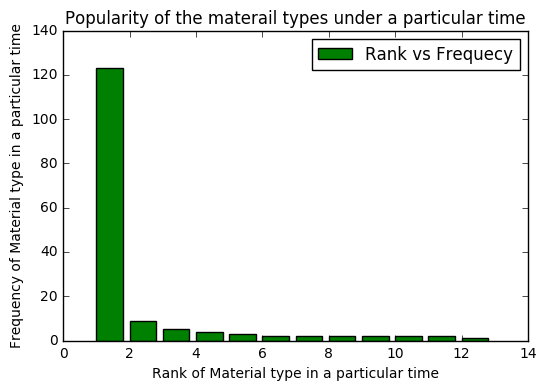

In [604]:
# Graph plotted for the Material's rank which has most popular in a particular time period against its frequency 
import matplotlib.pyplot as plt
plt.bar(Specific_Materailrank_list, Specific_Materialfreq_list, label="Rank vs Frequecy", color ='g')
plt.xlabel('Rank of Material type in a particular time')
plt.ylabel('Frequency of Material type in a particular time')
plt.title("Popularity of the materail types under a particular time")
plt.legend()
plt.show()

### Conclusion of Analysis -- 3
*From the above analysis it is clearly seen that there is a much popularity on the Material type = NEWS in a specific time period which has the highest spike in the graph**
